In [1]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
%matplotlib notebook

#https://github.com/scikit-optimize/scikit-optimize/tree/master/examples
from skopt import gp_minimize
from skopt import dummy_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

from skopt.plots import plot_convergence

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


In [2]:
def plot_bayesian(ax, accuracies):
    x = np.arange(len(accuracies))
    for line in ax.lines:
        line.set_xdata(x)
        y = accuracies
        line.set_ydata(y)
    y = accuracies
    ax.plot(x, y)
    plt.xticks(np.arange(0,len(accuracies), 1))
    ax.set_ylim(ymin=0, ymax=1)
    fig.canvas.draw()


In [3]:
import colour_data as colour
X_train_colour, X_test_colour, y_train_colour, y_test_colour =  colour.pix2lab(colour.X_train), colour.pix2lab(colour.X_test), colour.y_train, colour.y_test

In [4]:
import weather_data as weather
X_train_weather, X_test_weather, y_train_weather, y_test_weather = weather.X_train, weather.X_test, weather.y_train, weather.y_test

In [5]:
import student_data as student
X_train_student, X_test_student, y_train_student, y_test_student = student.X_train, student.X_test, student.y_train, student.y_test

In [6]:
# KNN
def KNN(title, X_train, X_test, y_train, y_test, strategy):
    accuracies = []
    fig,ax = plt.subplots(1,1,)
    fig.set_size_inches(8.5, 2.5)
    ax.set_title('KNN: ' + title)
    ax.set_xlabel('Trials')
    ax.set_ylabel('Accuracy')

    knn_space = [
        Integer(1, 55),    # n_neighbors=params[0], 
        Integer(2, 100),    # leaf_size=params[1], 
        Integer(1, 6)    # p=params[2], 
    ]
    
    def knn_objective(params):
        knn_lab_model = make_pipeline(KNeighborsClassifier(
            n_neighbors=params[0], 
            leaf_size=params[1], 
            p=params[2], 
            algorithm='auto', 
            n_jobs=-1, # use all cores
        ))
        knn_lab_model.fit(X_train, y_train)
        y_predicted = knn_lab_model.predict(X_test)
        acc = accuracy_score(y_test, y_predicted)
        accuracies.append(acc)
        plot_bayesian(ax, accuracies)
        return 1 - acc
    
    calls = 15
    knn_result = strategy(knn_objective, knn_space, n_calls=calls)
    plt.savefig("KNN" + title)

    print("Best score with", calls, "calls:", 1 - knn_result.fun)

    print("Best parameters:")
    print("- neighbors=%d"%(knn_result.x[0]))
    print("- leaf-size=%d"%(knn_result.x[1]))
    print("- p=%d"%(knn_result.x[2]))
    # plot_convergence(knn_result);
    # plt.show()

In [16]:
# Perceptron
def MLP(title, X_train, X_test, y_train, y_test, strategy):
    accuracies = []
    fig,ax = plt.subplots(1,1,)
    fig.set_size_inches(8.5, 2.5)
    ax.set_title('Multi-layer Perceptron: ' + title)
    ax.set_xlabel('Trials')
    ax.set_ylabel('Accuracy')

    mlp_space = [
        Integer(2, 61),    # hideen_layer_size[0], 
        Integer(2, 61),    # hideen_layer_size[1], 
        Integer(1300, 2000) # max_iter
    ]
    def mlp_objective(params):
        MLP_lab_model = MLPClassifier(
            hidden_layer_sizes=(params[0], params[1]), 
            activation='relu', 
            solver='adam', 
            alpha=0.0001, 
            batch_size='auto', 
            learning_rate='constant', 
            learning_rate_init=0.001, 
            power_t=0.5, 
            max_iter=params[2], 
            shuffle=True, 
            random_state=None, 
            tol=0.0001, 
            verbose=False, 
            warm_start=True, 
            momentum=0.9, 
            nesterovs_momentum=True, 
            early_stopping=False, 
            validation_fraction=0.1, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-08)
        MLP_lab_model.fit(X_train, y_train)
        y_predicted = MLP_lab_model.predict(X_test)
        acc = accuracy_score(y_test, y_predicted)
        accuracies.append(acc)
#         plot_bayesian(ax, accuracies)
        return 1 - acc

    calls = 15
    mlp_result = strategy(mlp_objective, mlp_space, n_calls=calls)
    plt.savefig("MLP" + title)
    print("Best score with", calls, "calls:", 1 - mlp_result.fun)

    print("Best parameters:")
    print("- hidden_layer_size=(%d, %d)"%(mlp_result.x[0], mlp_result.x[1]))
#     plot_convergence(mlp_result);
#     plt.show()

In [13]:
def SVM(title, X_train, X_test, y_train, y_test, strategy):
    accuracies = []
    fig,ax = plt.subplots(1,1,)
    fig.set_size_inches(8.5, 2.5)
    ax.set_title('Support Vector Machine: ' + title)
    ax.set_xlabel('Trials')
    ax.set_ylabel('Accuracy')

    svm_space = [
        Real(1,100), # C
#         Categorical(['poly', 'rbf']), # kernel
#         Integer(1,6), # degree for 'poly'
#         Real(0,1), # gamma
#         (1,1000), # coef0
    #     (True,False), # shrinking
    #     (True,False), # probability
    ]
    def svm_objective(params):
        svm_model = make_pipeline(SVC(
            C= params[0], 
#             kernel= params[1], 
#             degree= params[2], 
#             gamma= params[3], 
#             coef0= params[4], 
    #         shrinking= params[5], 
    #         probability= params[6], 
            decision_function_shape= 'ovr',
        ))
        svm_model.fit(X_train, y_train)
        y_predicted = svm_model.predict(X_test)
        acc = accuracy_score(y_test, y_predicted)
        print("Current accuracy:", acc)
        accuracies.append(acc)
#         plot_bayesian(ax, accuracies)
        return 1 - acc


    calls = 15
    svm_result = strategy(svm_objective, svm_space, n_calls=calls, random_state=0)

    plt.savefig("SVM" + title)
    print("Best score with", calls, "calls:", 1 - svm_result.fun)

    print("Best parameters:")
    print("- c=%d"%(svm_result.x[0]))
#     print("- kernel=%r"%(svm_result.x[1]))
#     print("- degree=%d"%(svm_result.x[2]))
#     print("- gamma=%.4f"%(svm_result.x[3]))
#     print("- coef0=%d"%(svm_result.x[4]))
    # print("- shrinking=%r"%(svm_result.x[5]))
    # print("- probability=%r"%(svm_result.x[6]))

#     plot_convergence(svm_result);
#     plt.show()

In [9]:
titles = ["Colour", "Weather", "Student"]
X_trains = [X_train_colour, X_train_weather, X_train_student]
X_tests = [X_test_colour, X_test_weather, X_test_student]
y_trains = [y_train_colour, y_train_weather, y_train_student]
y_tests = [y_test_colour, y_test_weather, y_test_student]

<IPython.core.display.Javascript object>


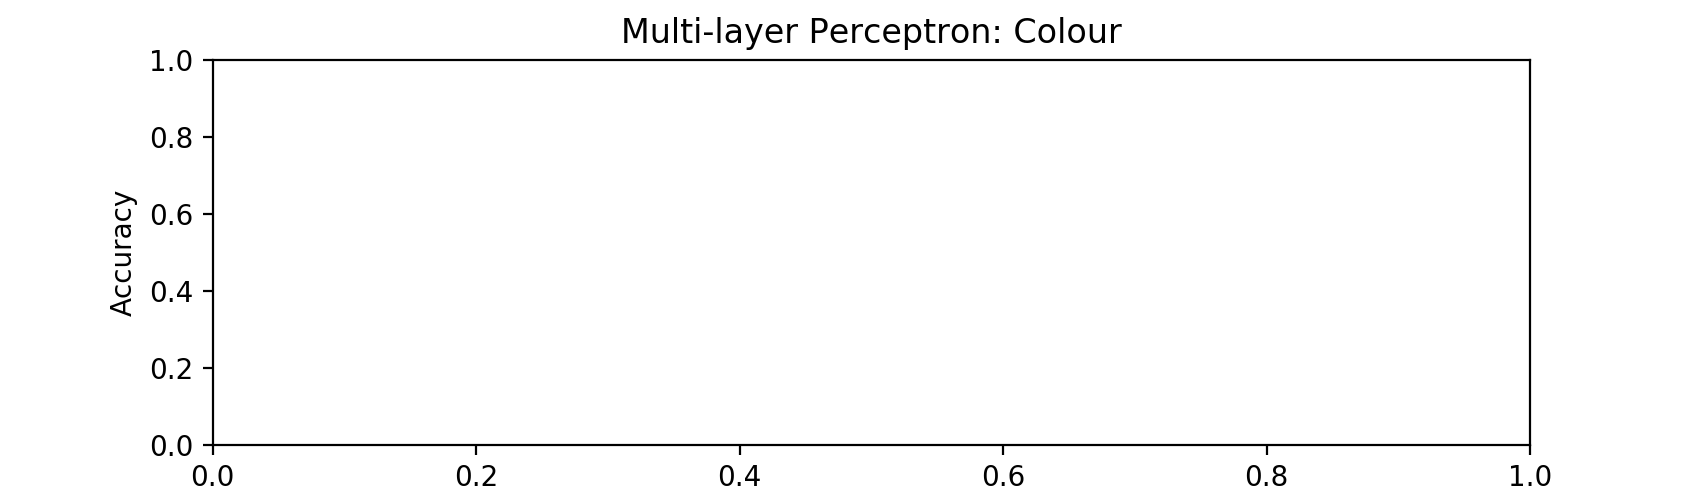

Best score with 15 calls: 0.715460526316
Best parameters:
- hidden_layer_size=(27, 44)


<IPython.core.display.Javascript object>


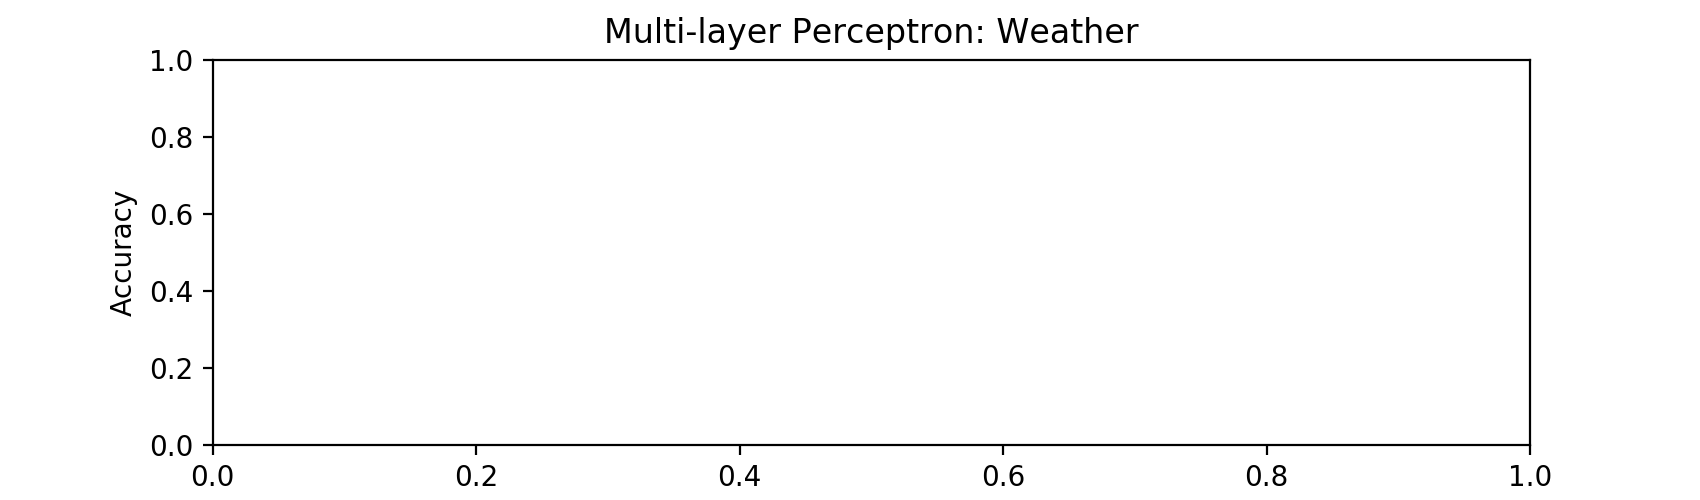

Best score with 15 calls: 0.596551724138
Best parameters:
- hidden_layer_size=(16, 34)


<IPython.core.display.Javascript object>


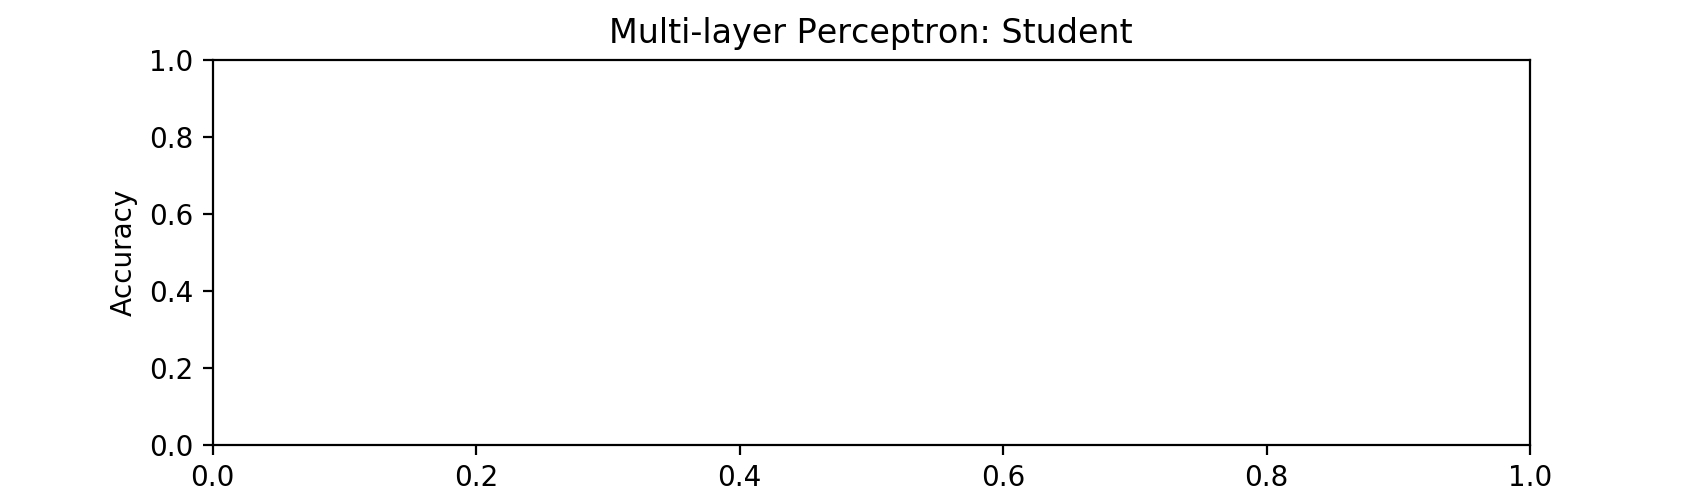

/Users/june/Library/Python/3.6/lib/python/site-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best score with 15 calls: 0.733333333333
Best parameters:
- hidden_layer_size=(18, 33)


In [18]:
for index, title in enumerate(titles):
    MLP(title, X_trains[index], X_tests[index], y_trains[index], y_tests[index], dummy_minimize)

<IPython.core.display.Javascript object>


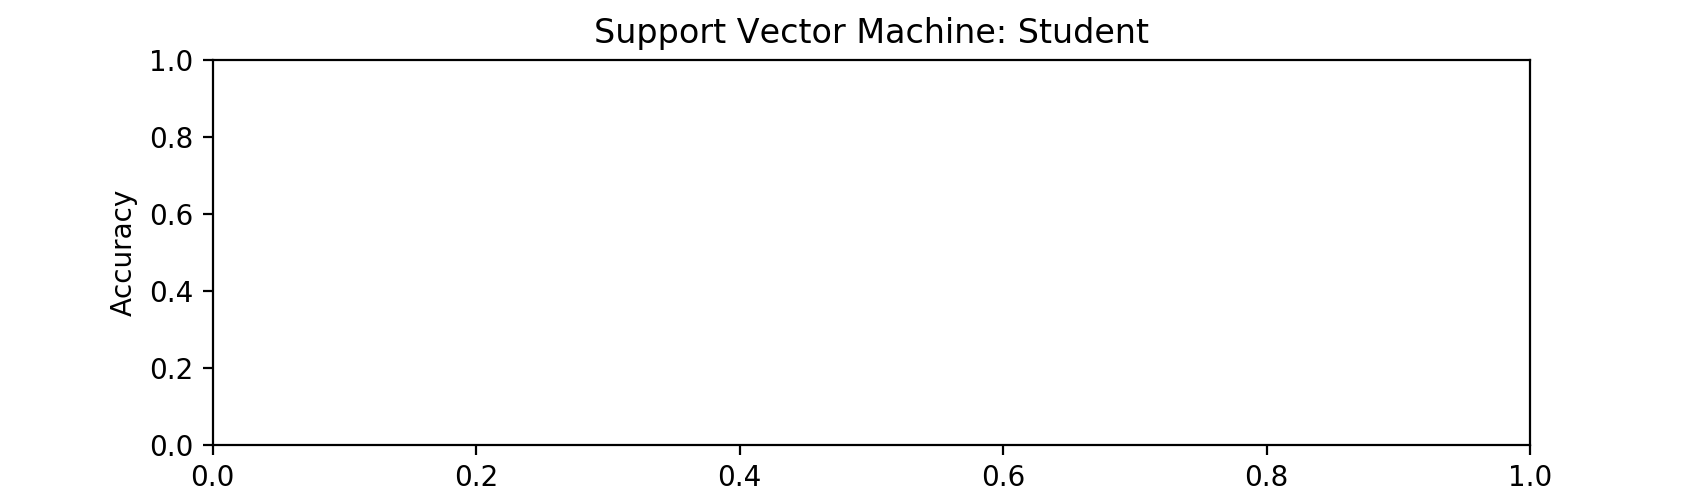

/Users/june/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/june/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/june/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/june/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Current accuracy: 0.466666666667
Current accuracy: 0.466666666667
Current accuracy: 0.466666666667
Current accuracy: 0.466666666667
Current accuracy: 0.466666666667
Current accuracy: 0.466666666667
Current accuracy: 0.466666666667


/Users/june/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/june/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/june/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/june/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Current accuracy: 0.466666666667
Current accuracy: 0.466666666667
Current accuracy: 0.466666666667
Current accuracy: 0.466666666667
Current accuracy: 0.466666666667
Current accuracy: 0.466666666667
Current accuracy: 0.466666666667


/Users/june/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current accuracy: 0.466666666667
Best score with 15 calls: 0.466666666667
Best parameters:
- c=55


In [14]:
SVM("Student",X_train_student, X_test_student, y_train_student, y_test_student, dummy_minimize)